In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from myfunc import timer
from myfunc import DirMan
import config

resolution = config.resolution
name       = config.name
region     = config.region
data_path  = config.data_path
shp_path   = config.shp_path
fig_path   = config.fig_path

print('python draw_b1_box.py')

df = pd.read_csv(f'/tera11/zhwei/students/Xionghui/data/run/0p1_exp1/csv/Global_statistics.csv')

python draw_b1_box.py


In [ ]:
## group together Koppen first and second letter groups
df_Koppen = df.copy()
df_Koppen = df_Koppen[df_Koppen['Koppen'] > 0]
df_Koppen = df_Koppen[df_Koppen['Koppen'] < 29]
df_Koppen['Koppen_Together'] = df_Koppen['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

# Grouped first and second letters of koppen climate types:
#5 to 4
#7 to 6
#9, 10 to 8
#13, 12 to 11
#16, 15 to 14
#20, 19, 18 to 17
#24, 23, 22 to 21
#28, 27, 26 to 25
#29 alone

## Check that no Koppen groups have less than 200km area
print('Area of each group (km^2):')

# Remove 2 and 3
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] > 3]
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] != 21]

print('Koppen Area:')
koppen_area_sum = df_Koppen.groupby('Koppen_Together')['Area'].sum().sort_values(ascending=False)
print(koppen_area_sum)

df_Koppen_reorder = df_Koppen.merge(koppen_area_sum, how='left', on='Koppen_Together', suffixes=('', '_area_sum'))
df_Koppen_sorted = df_Koppen_reorder.sort_values(by='Area_area_sum', ascending=False)

# Setup dataframe with all Koppen Groups, Values, and Colors
KoppenColor = ['#0000FE','#0077FF','#46A9FA','#FE0000','#FE9695','#F5A301','#FFDB63','#FDFD45','#C6C700','#96FF96','#63C764','#329633','#C6FF4E','#66FF33','#33C701','#FF00FE','#C600C7','#963295','#966495','#ABB1FF','#5A77DB','#4C51B5','#320087','#18DCDC','#38C7FF','#007E7D','#00455E','#B2B2B2','#686868']
KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)','Desert (BWh)','Arid (BWk)','Semi Arid (BSh)','Semi Arid (BSk)','Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)','Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)','Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)','Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)','Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)','Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)','Tundra (ET)']
KoppenList_short = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)','Desert & Arid (BW)','Arid (BWk)','Semi Arid (BS)','Semi Arid (BSk)','Mediterranean (Cs)','Mediterranean (Csb)','Mediterranean (Csc)','Humid Subtropical &\nOceanic (Cw)','Oceanic (Cwb)','Ocanic (Cwc)','Humid Subtropical &\nOceanic (Cf)','Oceanic (Cfb)','Oceanic (Cfc)','Humid Continental &\nSubarctic (Ds)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)','Humid Continental &\nSubarctic (Dw)','Humid Continental (Dw)','Subarctic (Dwc)','Subarctic (Dwd)','Humid Continental &\nSubarctic (Df)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)','Tundra (ET)']

KoppenColors = pd.DataFrame()
KoppenColors['color'] = KoppenColor
KoppenColors['name'] = KoppenList_short
KoppenColors['number'] = np.arange(1,30, step = 1)

# Filter Koppen data and aesthetics by group for plotting:
koppen_ids = df_Koppen['Koppen_Together'].unique()
aesthetics = KoppenColors[KoppenColors.number.isin(koppen_ids)]

aesthetics_reorder = KoppenColors[KoppenColors.number.isin(koppen_ids)].copy()
aesthetics_reorder['area_sum'] = aesthetics_reorder['number'].map(koppen_area_sum)
aesthetics_reorder = aesthetics_reorder.sort_values(by='area_sum', ascending=False)
print('Reorder Unique Koppen Color is:')
print(aesthetics_reorder50)

# set font size
#plt.rc('xtick', labelsize=16) 
#plt.rc('ytick', labelsize=16) 

Area of each group (km^2):
Koppen Area:
Koppen_Together
25    5.007790e+12
3     3.374888e+12
14    1.956601e+12
11    1.859499e+12
21    1.404858e+12
2     1.281730e+12
1     1.081094e+12
4     7.972057e+11
6     5.312368e+11
8     4.996886e+11
17    3.592498e+11
Name: Area, dtype: float64
Reorder Unique Koppen Color is:
      color                                 name  number      area_sum
24  #38C7FF  Humid Continental &\nSubarctic (Df)      25  5.007790e+12
2   #46A9FA                Tropical Savanna (Aw)       3  3.374888e+12
13  #66FF33    Humid Subtropical &\nOceanic (Cf)      14  1.956601e+12
10  #63C764    Humid Subtropical &\nOceanic (Cw)      11  1.859499e+12
20  #5A77DB  Humid Continental &\nSubarctic (Dw)      21  1.404858e+12
1   #0077FF                Tropical Monsoon (Am)       2  1.281730e+12
0   #0000FE             Tropical Rainforest (Af)       1  1.081094e+12
3   #FE0000                   Desert & Arid (BW)       4  7.972057e+11
5   #F5A301                       Sem

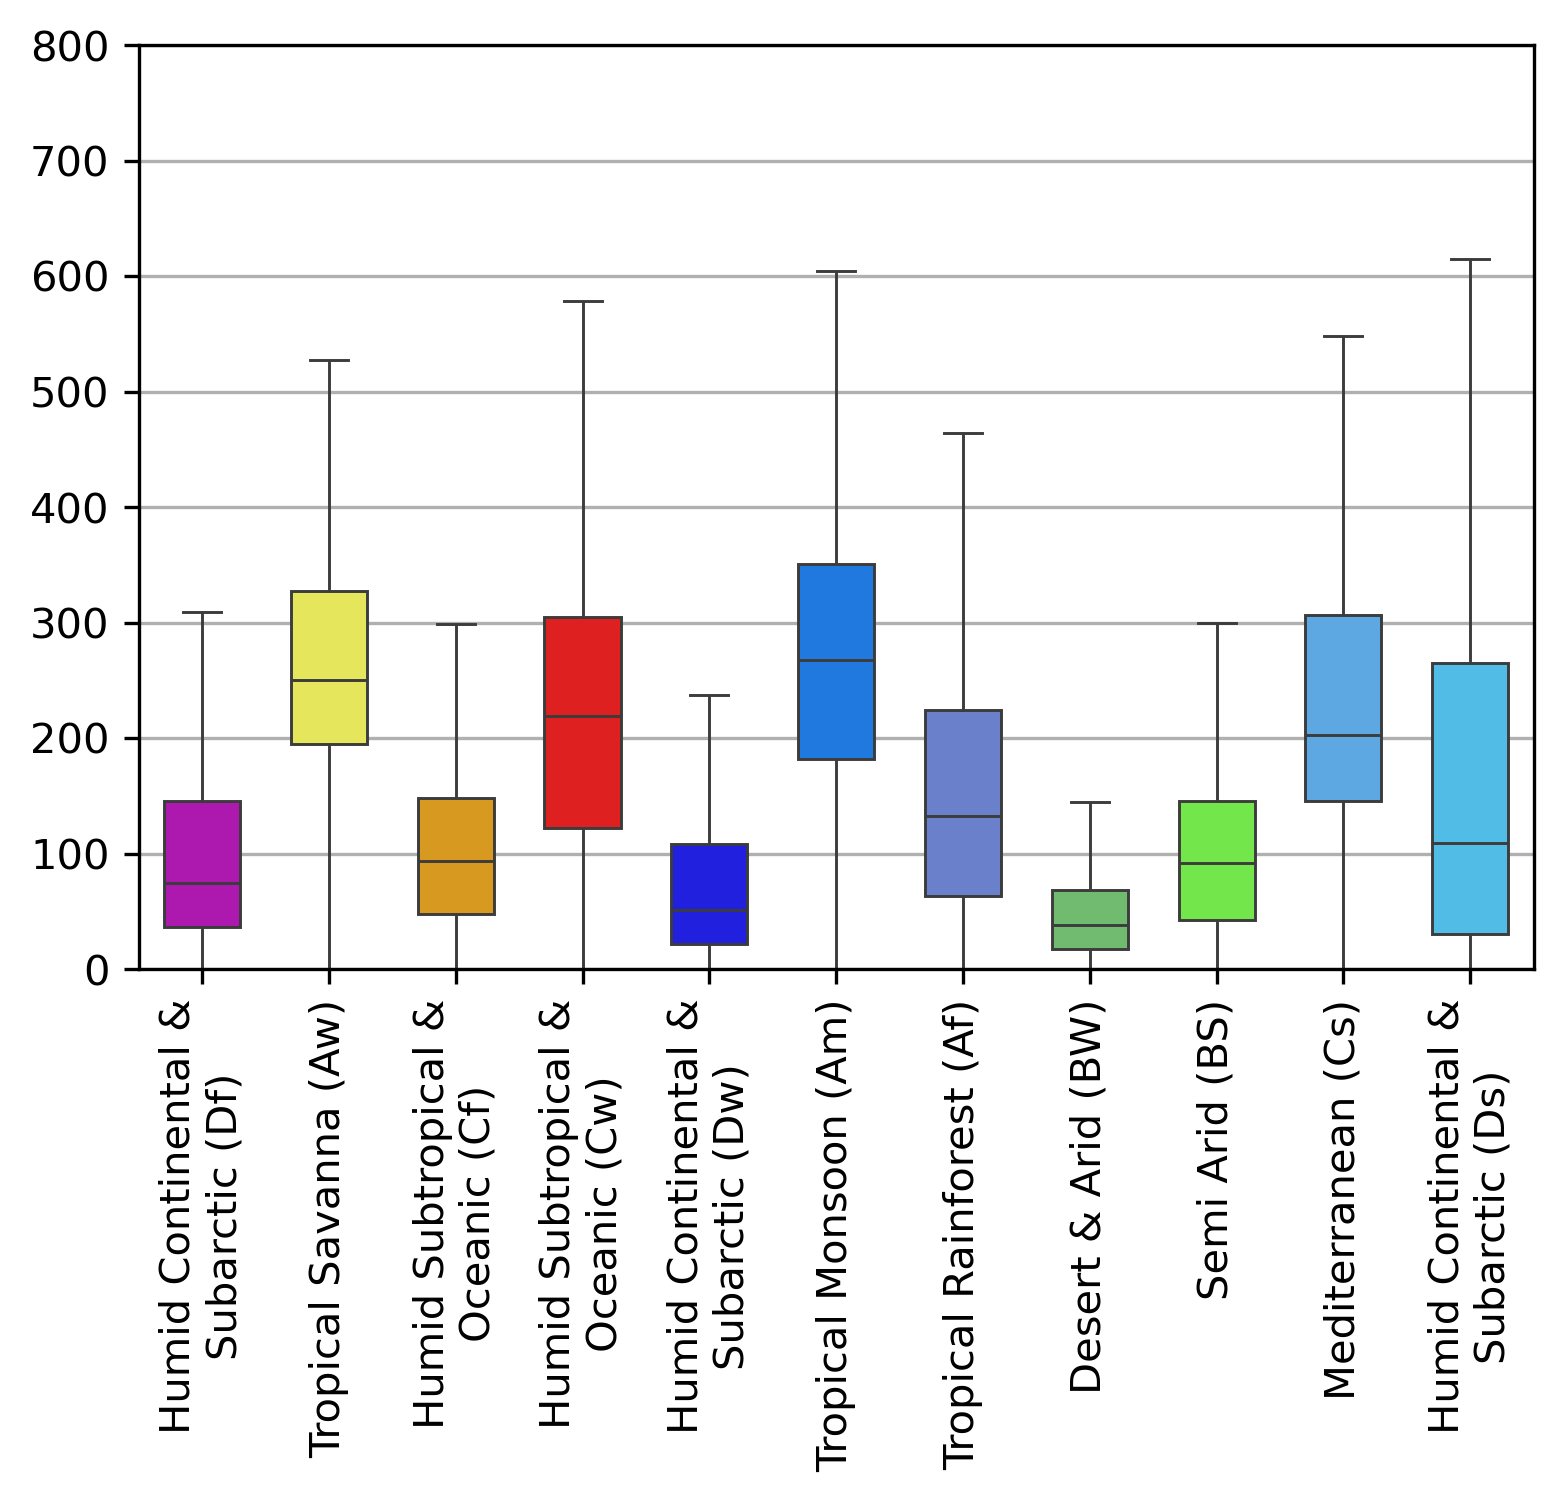

In [6]:
# set figure size
f, ax = plt.subplots(figsize=(6, 4), dpi=300) 
order = koppen_area_sum.index.tolist()
# sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Koppen_Together", data=df_Koppen, width=.6, linewidth = .7, palette=aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Area_area_sum", data=df_Koppen_sorted, width=.6, linewidth = .7, palette=aesthetics_reorder['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()

# Tweak the visual presentation
# plt.xticks(np.arange(0, 11, step=1), labels = aesthetics['name'],rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 11, step=1), labels = aesthetics_reorder['name'],rotation = 'vertical') # rotation='25', ha="right"
ax.yaxis.grid(True)
#ax.set_title('Köppen Climate Type')
ax.set_axisbelow(True)
#ax.set_xlabel(labels)
ax.set_ylim(0, 800)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_Koppen.pdf", transparent=True, bbox_inches='tight')
# plt.savefig(f"{fig_path}/b1_Koppen_reorder.pdf", transparent=True, bbox_inches='tight')

In [7]:
## Check that no IGBP groups have less than 2km area
df_IGBP = df.copy()

#Remove IGBP 3 = Deciduous needleleaf forest
df_IGBP = df_IGBP[df_IGBP['IGBP'] < 10]
df_IGBP = df_IGBP[df_IGBP['IGBP'] > 0]
# df_IGBP = df_IGBP[df_IGBP['IGBP'] != 3]

print('IGBP Grid Count:')
# print(df_IGBP.groupby('IGBP')['Area'].count())

print('IGBP Area:')
igbp_area_sum = df_IGBP.groupby('IGBP')['Area'].sum().sort_values(ascending=False)
print(igbp_area_sum)

df_IGBP_reorder = df_IGBP.merge(igbp_area_sum, how='left', on='IGBP', suffixes=('', '_area_sum'))
df_IGBP_sorted = df_IGBP_reorder.sort_values(by='Area_area_sum', ascending=False)

lcoi = ['Evergreen Needleleaf\nForests','Evergreen Broadleaf\nForests','Deciduous Needleleaf\nForests','Deciduous Broadleaf\nForests','Mixed Forests','Closed Shrublands','Open Shrublands','Woody Savannas','Savannas','Grasslands']
qgis_colors = ['#f8de85', '#FAC13E','#a5537f','#a52653','#c04a02','#A4B381','#52B33F','#74B3B8','#B183B8','#7846A8']
IGBPList = ['Evergreen Needleleaf\nForests', 'Evergreen Broadleaf\nForests', 'Deciduous Needleleaf\nForests', 'Deciduous Broadleaf\nForests', 'Mixed Forests', 'Closed Shrublands', 'Open Shrublands', 'Woody Savannas', 'Savannas', 'Grasslands', 'Permanent Wetlands', 'Croplands', 'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 'Permanent Snow and Ice', 'Barren', 'Water Bodies']
land_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

land_aes = pd.DataFrame()
land_aes['name'] = lcoi
land_aes['number'] = land_numbers
land_aes['color'] = qgis_colors

# Filter Koppen data and aesthetics by group for plotting:
IGBP_ids = df_IGBP['IGBP'].unique()
land_aesthetics = land_aes[land_aes.number.isin(IGBP_ids)]

land_aesthetics_reorder = land_aes[land_aes.number.isin(IGBP_ids)].copy()
land_aesthetics_reorder['area_sum'] = land_aesthetics_reorder['number'].map(igbp_area_sum)
land_aesthetics_reorder = land_aesthetics_reorder.sort_values(by='area_sum', ascending=False)
print('Reorder Unique IGBP Color is:')
print(land_aesthetics_reorder)

IGBP Grid Count:
IGBP Area:
IGBP
9    3.790899e+12
2    3.153505e+12
8    3.097322e+12
7    2.716488e+12
5    2.183840e+12
4    1.460493e+12
6    7.648500e+11
1    7.200019e+11
3    4.826990e+11
Name: Area, dtype: float64
Reorder Unique IGBP Color is:
                            name  number    color      area_sum
8                       Savannas       9  #B183B8  3.790899e+12
1   Evergreen Broadleaf\nForests       2  #FAC13E  3.153505e+12
7                 Woody Savannas       8  #74B3B8  3.097322e+12
6                Open Shrublands       7  #52B33F  2.716488e+12
4                  Mixed Forests       5  #c04a02  2.183840e+12
3   Deciduous Broadleaf\nForests       4  #a52653  1.460493e+12
5              Closed Shrublands       6  #A4B381  7.648500e+11
0  Evergreen Needleleaf\nForests       1  #f8de85  7.200019e+11
2  Deciduous Needleleaf\nForests       3  #a5537f  4.826990e+11


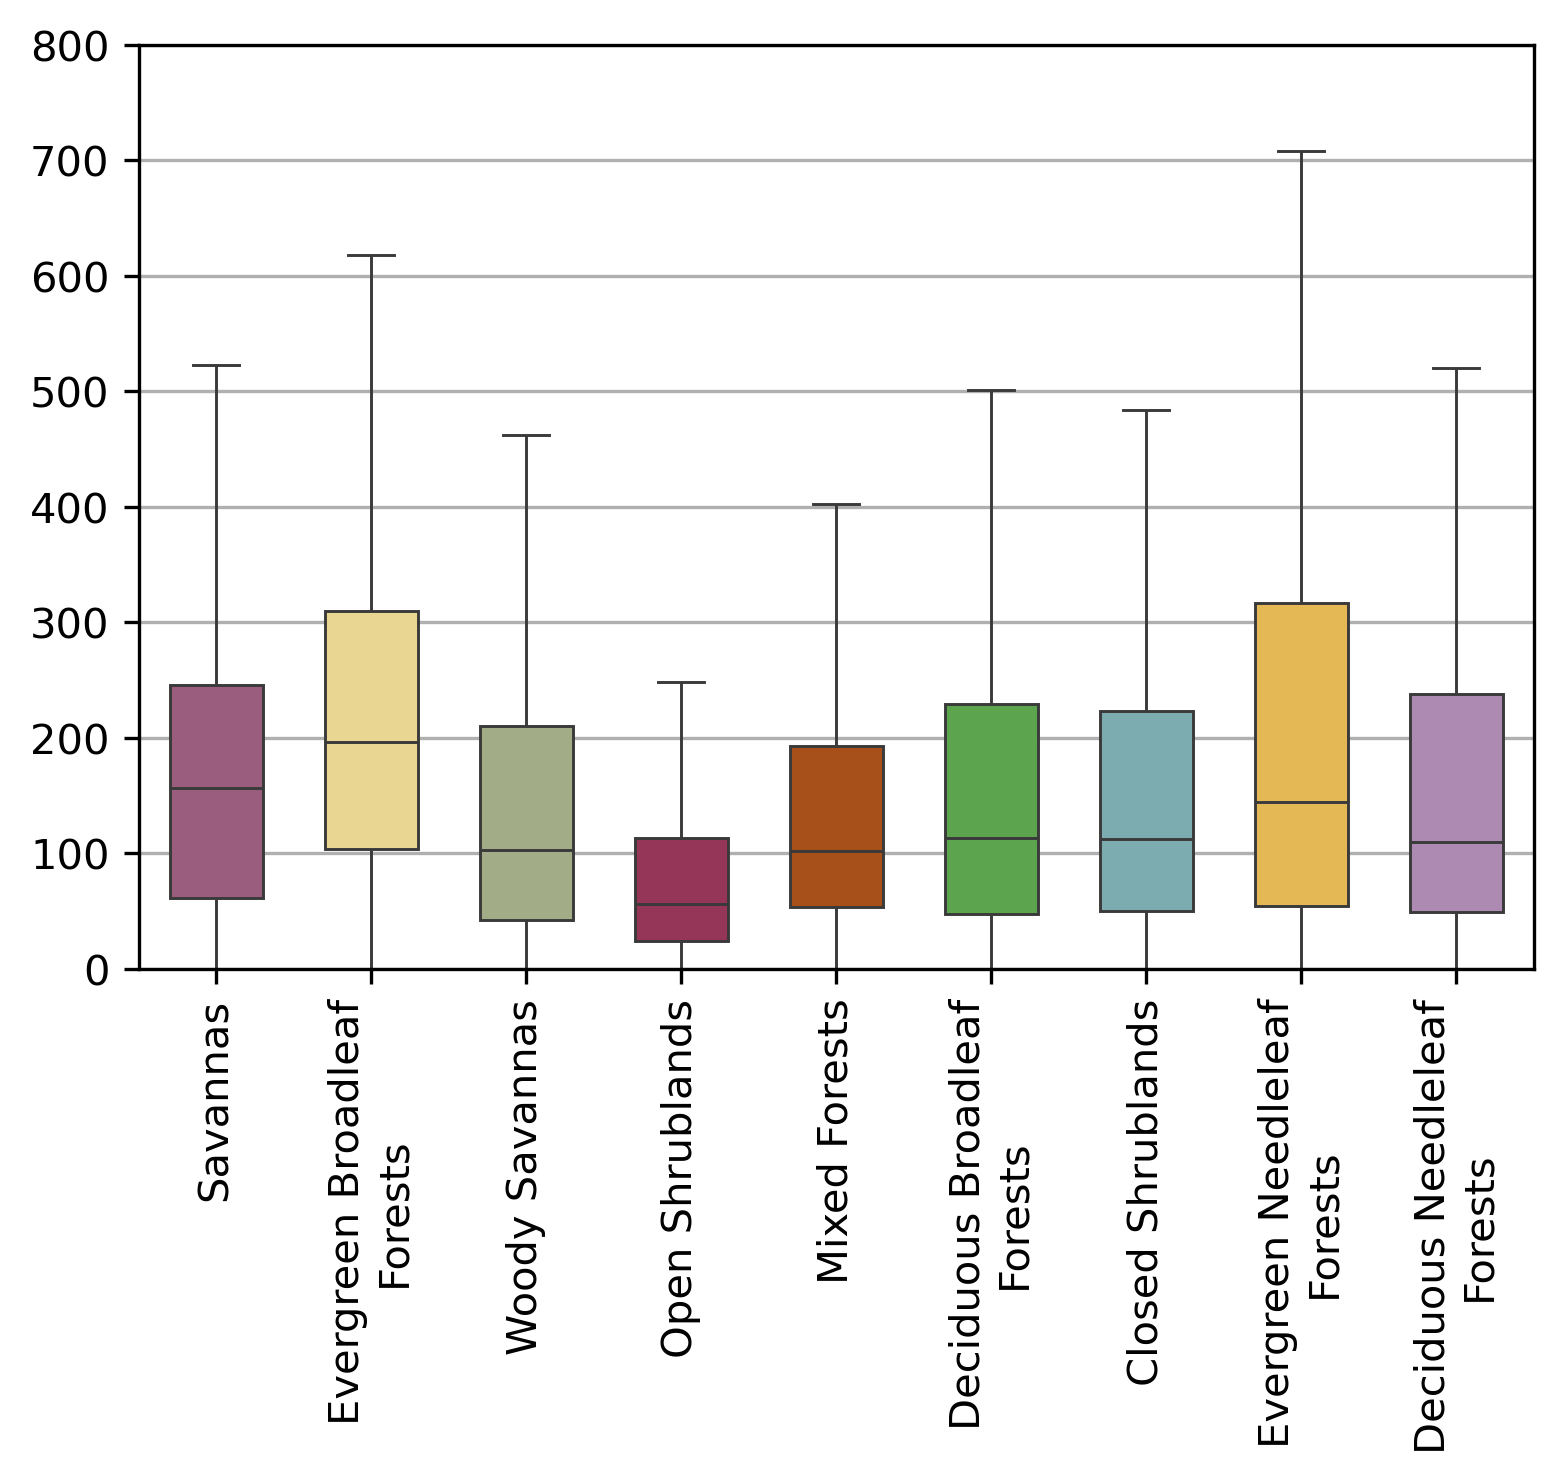

In [8]:
# Set fig size
f, ax = plt.subplots(figsize=(6, 4),dpi=300)
order = igbp_area_sum.index.tolist()
# sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP, hue = "IGBP", width=.6, linewidth = .7, palette = land_aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, hue = "Area_area_sum", width=.6, linewidth = .7, palette = land_aesthetics_reorder['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()
# plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics['name'], rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics_reorder['name'], rotation = 'vertical') # rotation='25', ha="right"

# Tweak the visual presentation
plt.xticks(rotation='vertical')
ax.set_axisbelow(True)
#ax.set_title('Biome')
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.grid(True)
ax.set_ylim(0, 800)
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_IGBP.pdf", transparent=True, bbox_inches='tight')
plt.savefig(f"{fig_path}/b1_IGBP_reorder.pdf", transparent=True, bbox_inches='tight')